In [ ]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize


images_dir = Path('/content/drive/MyDrive/kaggle/rice/ricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
flat_data = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    image_resized=resize(image,(224,224))
    images.append(image_resized)
    flat_data.append(image_resized.flatten())
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3,random_state=109)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,30))
hyperparameters = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 4


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[3 0 3 0 2 0 0 1 2 2 1 3 3 2 0 1 3 2 1 2 3 0 0 0 3 0 1 2 0 1 3 1 0 3 2 3 0
 1 1 3 2 1 3 1 3 2 1 1]


In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
      
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)
      
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[12  0  0  0]
 [ 0  5  3  2]
 [ 0  6  4  2]
 [ 0  2  3  9]]
Accuracy :  62.5
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.38      0.50      0.43        10
           2       0.40      0.33      0.36        12
           3       0.69      0.64      0.67        14

    accuracy                           0.62        48
   macro avg       0.62      0.62      0.62        48
weighted avg       0.63      0.62      0.63        48



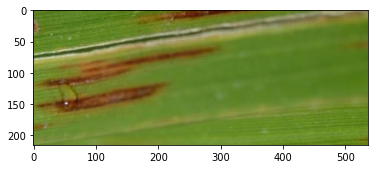

Predicted Disease is Brown spot


In [ ]:
import matplotlib.pyplot as plt
imagetest=skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Leaf smut/DSC_0510.jpg')
flattenimg=[]
img_resized = resize(imagetest,(224,224), anti_aliasing=True, mode='reflect')
flattenimg.append(img_resized.flatten())
%matplotlib inline
plt.imshow(imagetest)
plt.show()
k = target_names
p = clf.predict(flattenimg)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", k[a])